In [19]:
import sys
sys.path.append('../')

import time
import numpy as np
import sympy as sy
from sympy import *

from qsopt.plots import plot_optim

In [20]:
print(1e-5)

1e-05


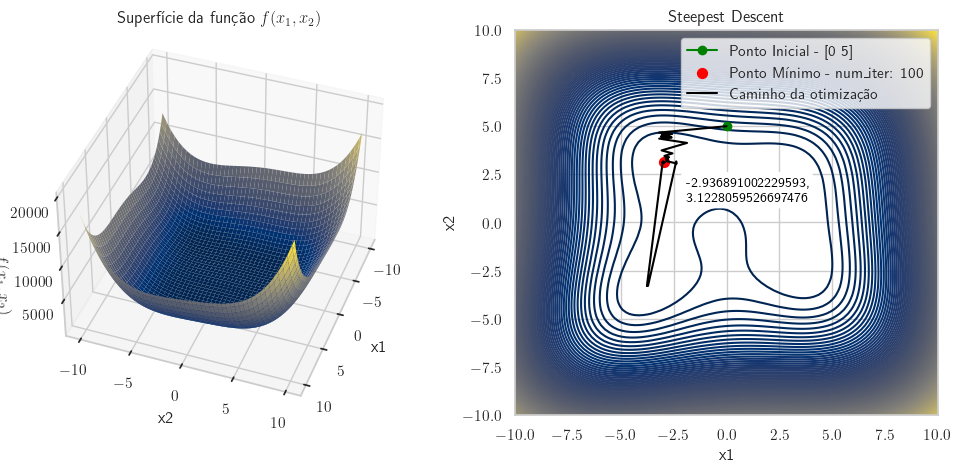

In [18]:
def golden_search(f, lbound, ubound, max_iter=100, tol=1e-5):
    phi = (np.sqrt(5)-1)/2  # Golden ratio
    num_iter = 0
    a, b = lbound, ubound
    beta = np.linalg.norm(b-a)
    alpha_e = a + (1 - phi)*beta
    alpha_d = a + (phi*beta)
    
    while beta > tol:
#        if beta < tol:
 #           break
        if f(alpha_e) < f(alpha_d):  # f(alpha) > f(alpha_d) to find the maximum
            b = alpha_d
        else:
            a = alpha_e

        beta = np.linalg.norm(b-a)
        alpha_e = a + (1 - phi)*beta
        alpha_d = a + (phi*beta)

        num_iter += 1
        
    alpha = (b + a) / 2
    fmin = f(alpha)

    result = {
        'alpha': alpha[np.argmin(alpha)],
        'fmin': fmin,
        'num_iter': num_iter,
    }
    return result

def line_search(func, initial_point, d):
    def f(alpha): return func(initial_point + alpha*d)
    a, b = np.array([-10, -10]), np.array([10, 10])
    r = golden_search(f, a, b)
    a = r['alpha']
    x_opt = initial_point + a*d
    result = {
        'alpha': a,
        'xopt': x_opt,
        'fmin': func(x_opt),
        'initial_point': initial_point,
        'num_iter': r['num_iter'],
    }
    return result


def steepest_descent(objective_function, grad, initial_point, tol=1e-5, max_iter=100):
    x = initial_point.copy()
    a = np.array([-10, -10])
    b = np.array([10, 10])
    num_iter = 0
    d = -grad(x)
    path = [x]
    #alphas = []

    for _ in range(max_iter):
        if np.linalg.norm(d) < tol:
            break
        x_opt = line_search(objective_function, x, d)['xopt']
        #alphas.append(alpha)
        x = x_opt
        d = -grad(x)

        num_iter += 1
        path.append(x)

    result = {
                'method_name': 'Steepest Descent',
                'xopt': x, 
                'fmin': objective_function(x), 
                'num_iter': num_iter, 
                'path': np.array(path),
                #'alphas': np.array(alphas),
                }
                
    return result

def f(x):
    return (x[0]**2+x[1]-11)**2 + (x[0]+x[1]**2-7)**2

def grad(x):
    return np.array([4*x[0]*(x[0]**2 + x[1] - 11) + 2*x[0] + 2*x[1]**2 - 14, 2*x[0]**2 + 4*x[1]*(x[0] + x[1]**2 - 7) + 2*x[1] - 22])

x0 = np.array([0, 5])
method = steepest_descent(f, grad, x0)
plot_optim(f, x0, method)

In [3]:
x = np.array([0, 5])
d = -grad(x)
alpha= line_search(f, grad, x, d)[0]
x = x + alpha*d
x

array([-3.8662008 ,  4.60004819])